In [28]:
__author__ = '@Tssp'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import fftpack
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
plt.rcParams['xtick.labelsize']=18
plt.rcParams['ytick.labelsize']=18
plt.rcParams['axes.labelsize']=20
plt.rcParams['axes.titlesize']=20

In [29]:
NO2 = np.loadtxt('../Data/Est03PlC_CodPar08NO2_valuesonly.txt',
                 skiprows=1)
print('Length:', NO2.shape[0])

Length: 3621


In [30]:
startday = pd.datetime(2010, 1, 1)
dates = pd.date_range(startday, periods=NO2.shape[0], freq='D')
print(f'From {dates[0]} to {dates[-1]}')

From 2010-01-01 00:00:00 to 2019-11-30 00:00:00


Text(0, 0.5, 'NO2 [$\\mu g/ cm^3$]')

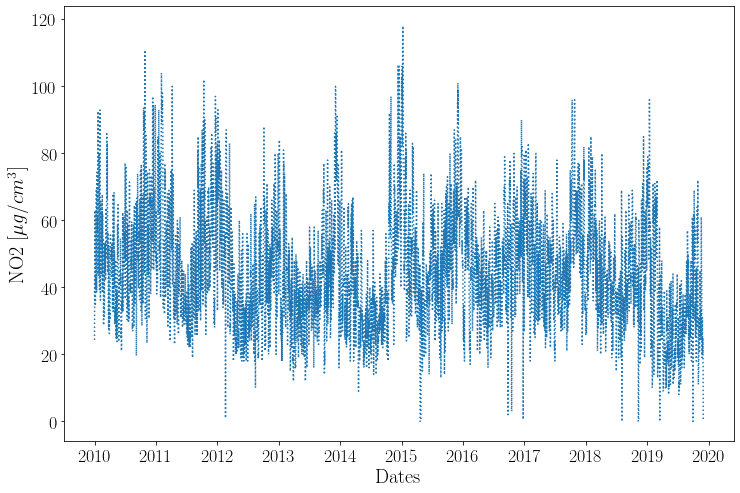

In [31]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(dates, NO2, ':')
ax.set_xlabel('Dates')
ax.set_ylabel('NO2 [$\mu g/ cm^3$]')

In [40]:
FFT = np.abs(fftpack.fft(NO2))[1:]
freqs = fftpack.fftfreq(NO2.shape[0], d=1)[1:]
FFT = FFT[(freqs >= 0)]
freqs = freqs[(freqs >= 0)]

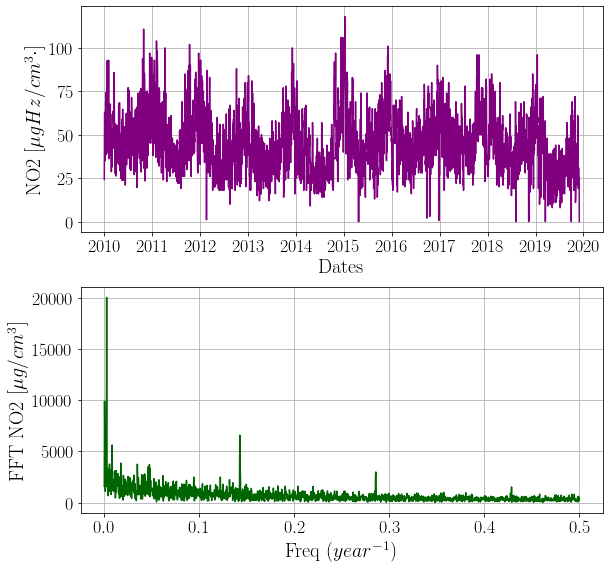

In [133]:
plt.figure(figsize=(16, 8))

ax = plt.subplot(2, 2, 1)
ax.plot(dates, NO2, color='purple', lw=1.5)
plt.xlabel('Dates')
plt.ylabel('NO2 [$\mu g Hz/ cm^3\cdot$]')
plt.grid(True)

ax = plt.subplot(2, 2, 3)
plt.plot(freqs, FFT, color='darkgreen', lw=1.5)
plt.xlabel('Freq $(year^{-1})$')
plt.ylabel('FFT NO2 [$\mu g/ cm^3$]')
plt.grid(True)

plt.tight_layout()
# plt.savefig('./Rn_FFT_zoom.eps', bbox_inches='tight')

In [134]:
# Firts maxima
j = (FFT == np.max(FFT))
print("The most relevant period in the time series is: ", round(1/freqs[j][0],2), "days")

The most relevant period in the time series is:  362.1 days


In [135]:
# Second maxima
print("The second most relevant period in the time series is: ", round(1/freqs[516],2), "days")

The second most relevant period in the time series is:  7.0 days


In [136]:
# Third maxima
print("The third most relevant period in the time series is: ", round(1/freqs[1034],2), "days")

The third most relevant period in the time series is:  3.5 days
